In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read images
bg_img = cv2.imread('GreenBackground.png', 1)
ob_img = cv2.imread('Object.png', 1)
target_bg = cv2.imread('NewBackground.jpg', 1)

# Resize images
size = (678, 381)
bg_img = cv2.resize(bg_img, size)
ob_img = cv2.resize(ob_img, size)
target_bg = cv2.resize(target_bg, size)

print(bg_img.shape)

(381, 678, 3)


(381, 678)


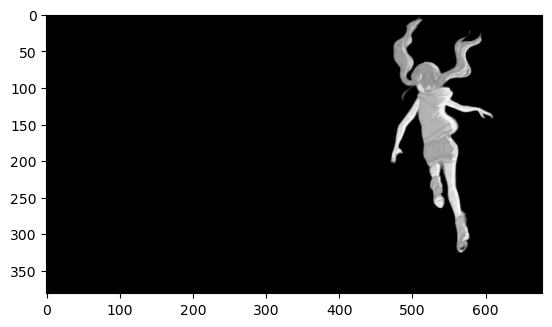

In [19]:
def compute_difference(bg_img, input_img):
    diff_three = cv2.absdiff(bg_img, input_img)
    diff_single = np.sum(diff_three, axis=2) / 3
    diff_single = diff_single.astype(np.uint8)

    return diff_single

diff_single = compute_difference(bg_img, ob_img)

plt.imshow(diff_single, cmap='gray')
print(diff_single.shape)

[0 0 0]


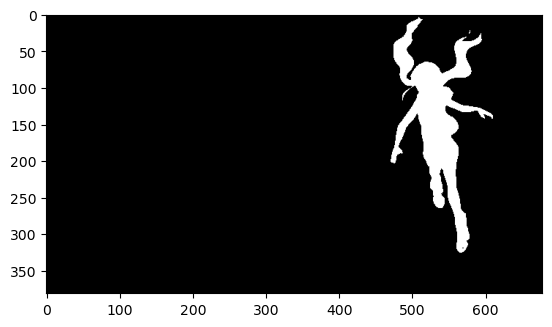

In [24]:
# Compute binary mask

def compute_binary_mask(difference, threshold=25):
    diff_binary = np.where(difference <= threshold, 0, 255)
    
    # Convert back to 3 colors
    diff_binary = np.stack((diff_binary,) * 3, -1)
    
    return diff_binary


diff_binary = compute_binary_mask(difference)
plt.imshow(diff_binary)
print(diff_binary[0, 0])

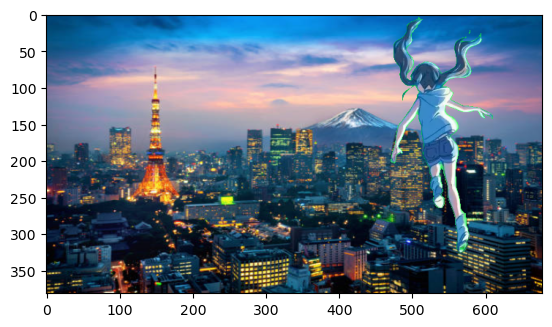

In [26]:
# Replace background

def replace_background(bg_img, ob_img, target_bg):
    difference_single_channel = compute_difference(bg_img, ob_img)
    binary_mask = compute_binary_mask(difference_single_channel)

    output = np.where(binary_mask==255, ob_img, target_bg)

    return output

output_img = replace_background(bg_img, ob_img, target_bg)

plt.imshow(output_img[:, :, ::-1])
    